**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading dataset

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Checking NA values

In [5]:
df.isnull().sum()
#There are no NA values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Correlation Matrix

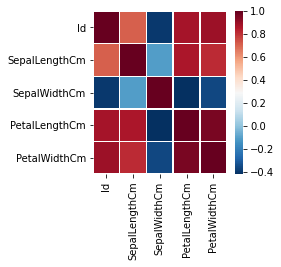

In [6]:
pearsoncorr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            linewidth=0.5,
            ax=ax)
#They are Positively Correlated

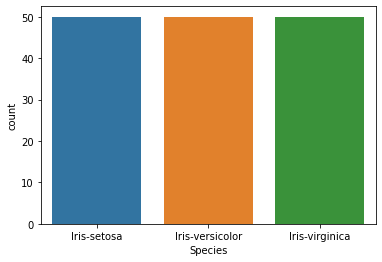

<Figure size 432x288 with 0 Axes>

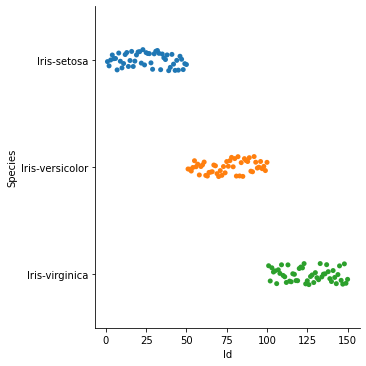

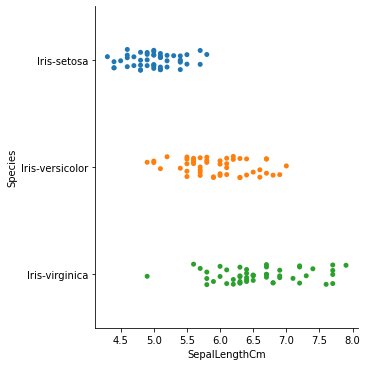

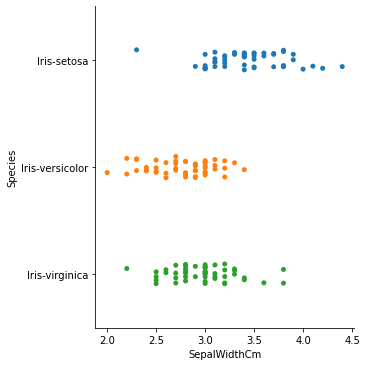

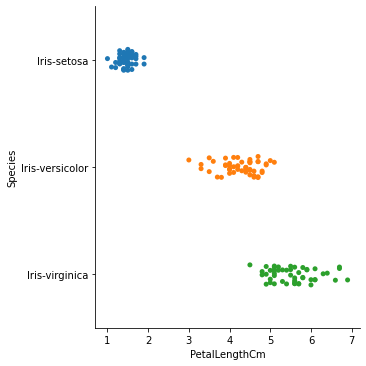

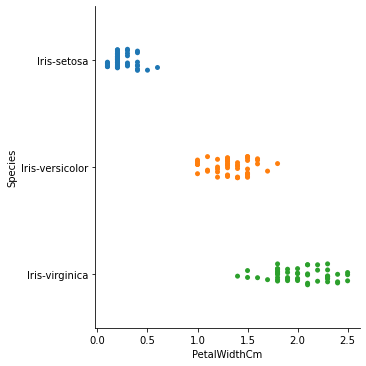

In [7]:
##Visualization
sns.countplot(x ='Species', data = df)
#There is no biasness in the data
num=df.select_dtypes(include=["float64", "int64"])
for i, col in enumerate(num.columns):
    plt.figure(i)
    sns.catplot(x =col, y = "Species", data = df) 

In [8]:
#Removing ID and Species column
df=df.drop(columns=["Id"], axis=1)
x=df.drop(columns=["Species"], axis=1).values

**Elbow Curve**

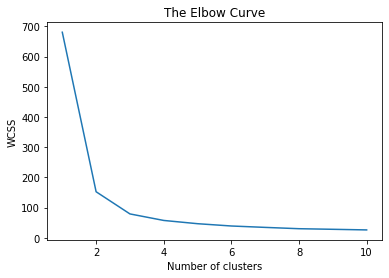

In [11]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
w = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    w.append(kmeans.inertia_)
plt.plot(range(1, 11), w)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#3 would be the best

In [12]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

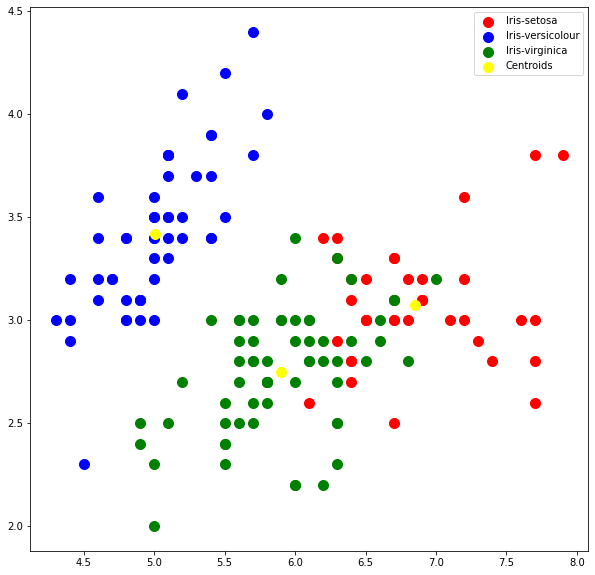

In [13]:
# Visualising the Training set results
# Visualising the clusters
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()